<a href="https://colab.research.google.com/github/Harleenk17/iris-csv/blob/main/iris_flower_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [ ]:
iris=pd.read_csv("https://raw.githubusercontent.com/Harleenk17/iris-csv/refs/heads/main/iris%20csv.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# check null values
iris.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
iris.shape

(150, 6)

In [ ]:
# unique values
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#split into features and target variables
# X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# y = iris['Species']
# X = iris.loc[:, ['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
X = iris.iloc[:, 1:-1]
Y= iris.iloc[:,-1]

In [ ]:
# split the data into train and test
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(x_train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
137            6.4           3.1            5.5           1.8
84             5.4           3.0            4.5           1.5
27             5.2           3.5            1.5           0.2
127            6.1           3.0            4.9           1.8
132            6.4           2.8            5.6           2.2
..             ...           ...            ...           ...
9              4.9           3.1            1.5           0.1
103            6.3           2.9            5.6           1.8
67             5.8           2.7            4.1           1.0
117            7.7           3.8            6.7           2.2
47             4.6           3.2            1.4           0.2

[120 rows x 4 columns]


In [ ]:
# encode the dataframe
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [ ]:
iris['Species']

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
model = LogisticRegression()
model.fit(x_train, Y_train)

LogisticRegression()

In [ ]:
# predict the model
y_pred = model.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

save model using joblib

In [ ]:
import joblib
joblib.dump(model, 'iris_model.joblib')

['iris_model.joblib']

predict flower using saved model

In [ ]:
predicted_species = le.inverse_transform(prediction)

In [ ]:
# Predict flower using saved model
data = [[5.1, 3.5, 1.4, 0.2]]
prediction = model.predict(data)

df = pd.DataFrame(data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
df['Predicted Species'] = predicted_species
print(df)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Predicted Species
0            5.1           3.5            1.4           0.2                  0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# accuracy of model
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


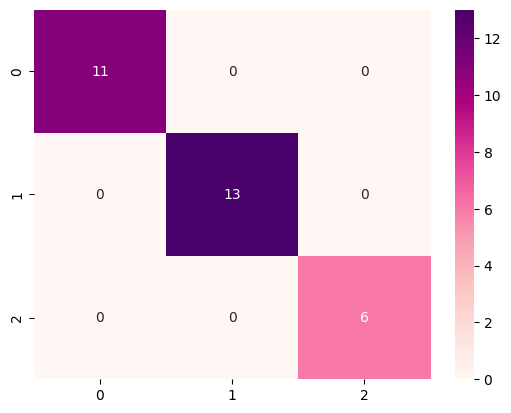

In [ ]:
# plot confusion matrix graph
import seaborn as sns
sns.heatmap(cm, annot=True , cmap='RdPu')
plt.show()

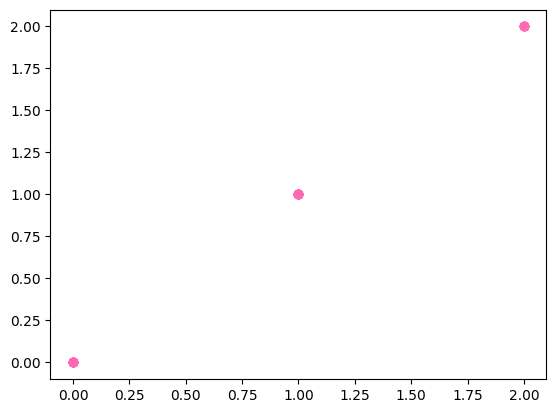

In [ ]:
# plot actual and predicted
plt.scatter(Y_test, y_pred , color='hotpink')
plt.show()

In [ ]:
# calculate mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 0.0
R2 Score: 1.0
